This work was done by YK and PM.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# A02.1 Average degree of the nearest neighbours

In [2]:
# Read the datasets
import os

def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        allFiles.append(entry)    
    return allFiles

myfiles = getListOfFiles('./data')

In [3]:
def plot_scatter_knn_avgd(graph, graph_rand, title):
    # Calculate average degree of the nearest neighbours for graph
    knn_avgd = nx.average_degree_connectivity(graph)
    k = np.array(list(knn_avgd.keys()))
    k_nn = np.array(list(knn_avgd.values()))
    
    # Calculate average degree of the nearest neighbours for randomised graph
    knn_avgd_rand = nx.average_degree_connectivity(graph_rand)
    k_rand = np.array(list(knn_avgd_rand.keys()))
    k_nn_rand = np.array(list(knn_avgd_rand.values()))
    
    # Plot results for graph
    plt.subplot(1, 2, 1)
    plt.scatter(k, k_nn)
    plt.title(title[6:-4])
    plt.ylabel('Average Degree NN k_nn(k)')
    plt.xlabel('Vertices degree k')
    
    # Plot results for randomised graph
    plt.subplot(1, 2, 2)
    plt.scatter(k_rand, k_nn_rand)
    plt.title('Random ' + title[6:-4])
    plt.ylabel('Average Degree NN k_nn(k)')
    plt.xlabel('Vertices degree k')
    
    plt.tight_layout()
    
    plt.show()

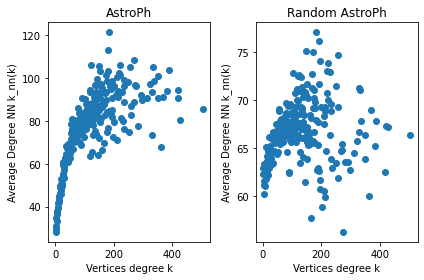

Assortativity coefficient of graph_AstroPh.gml : 0.20131706127372678
Assortativity coefficient of randomised graph_AstroPh.gml : 0.018418986597421576


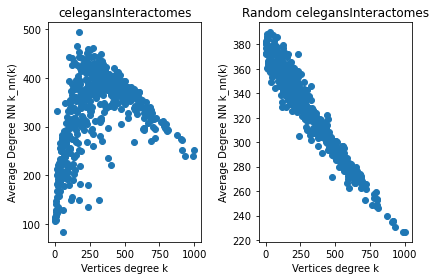

Assortativity coefficient of graph_celegansInteractomes.gml : 0.15169796960230705
Assortativity coefficient of randomised graph_celegansInteractomes.gml : -0.16141570904030275


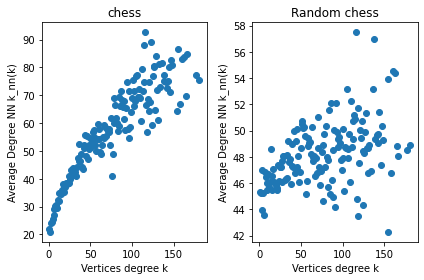

Assortativity coefficient of graph_chess.gml : 0.3705153782729769
Assortativity coefficient of randomised graph_chess.gml : 0.028488237471480563


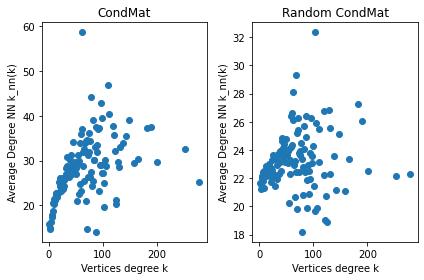

Assortativity coefficient of graph_CondMat.gml : 0.12528250398544855
Assortativity coefficient of randomised graph_CondMat.gml : 0.014895606356201293


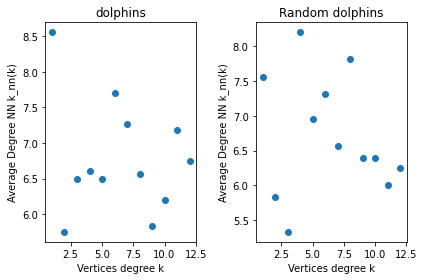

Assortativity coefficient of graph_dolphins.gml : -0.04359402821531255
Assortativity coefficient of randomised graph_dolphins.gml : -0.0531762772222979


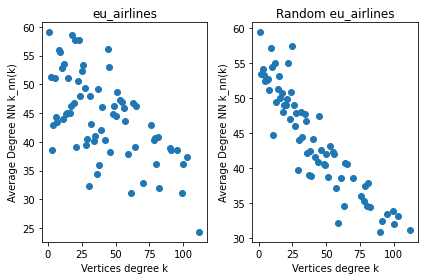

Assortativity coefficient of graph_eu_airlines.gml : -0.15180413274193835
Assortativity coefficient of randomised graph_eu_airlines.gml : -0.23047553049749714


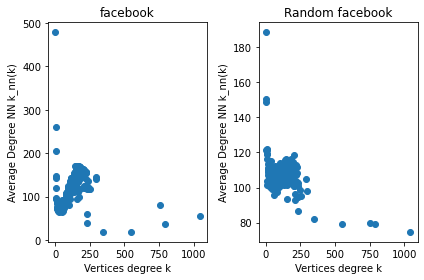

Assortativity coefficient of graph_facebook.gml : 0.06357722918564943
Assortativity coefficient of randomised graph_facebook.gml : -0.031149226973734973


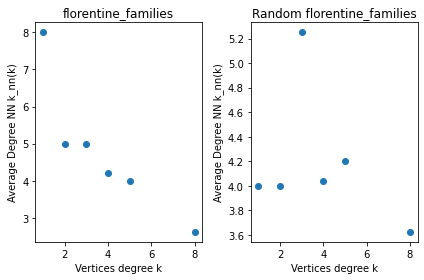

Assortativity coefficient of graph_florentine_families.gml : -0.47862867319679353
Assortativity coefficient of randomised graph_florentine_families.gml : -0.17809439002671498


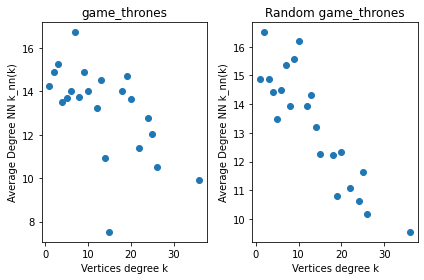

Assortativity coefficient of graph_game_thrones.gml : -0.1307696836693023
Assortativity coefficient of randomised graph_game_thrones.gml : -0.18172732326344115


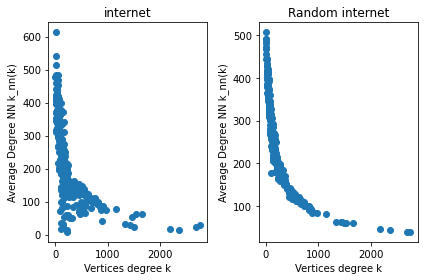

Assortativity coefficient of graph_internet.gml : -0.21486656615730235
Assortativity coefficient of randomised graph_internet.gml : -0.19761647489951958


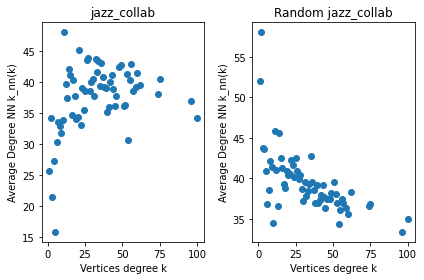

Assortativity coefficient of graph_jazz_collab.gml : 0.020237399275047713
Assortativity coefficient of randomised graph_jazz_collab.gml : -0.08628767823099665


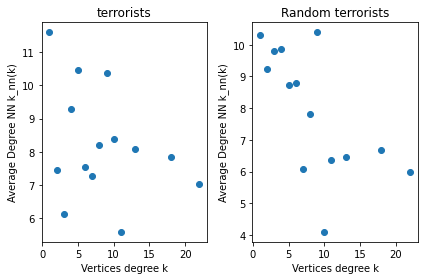

Assortativity coefficient of graph_terrorists.gml : -0.08047566178575725
Assortativity coefficient of randomised graph_terrorists.gml : -0.2108120186298546


In [4]:
for i in range(len(myfiles)) :
    # Read a file
    g = nx.read_gml('./data/' + myfiles[i])
    # Generate a randomised network
    grnd = nx.algorithms.smallworld.random_reference(g, connectivity=False)
    # 1. Plot the average degree of the nearest neighbours as a function of the vertices degree k
    plot_scatter_knn_avgd(g, grnd, myfiles[i])
    # 2. Compute the assortativity of the real network
    print('Assortativity coefficient of', myfiles[i], ':', nx.degree_assortativity_coefficient(g))
    # 3. Compute the assortativity of the randomised network
    print('Assortativity coefficient of randomised', myfiles[i], ':', nx.degree_assortativity_coefficient(grnd))

# A02.2 Clustering and randomisation

In [5]:
# Define the function to plot the degree distribution
def plot_degree_dstr(graph, title):
    degrees = [graph.degree[i] for i in graph.nodes()]
    my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 30)
    plt.hist(degrees, bins = my_bins, density = True)
    plt.axvline(np.mean(degrees), color = 'r')
    plt.title('The degree distribution of '+ title)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

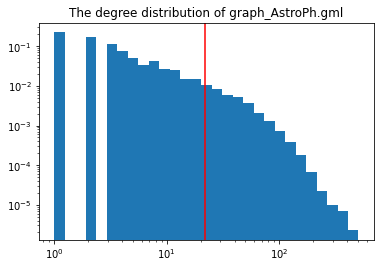

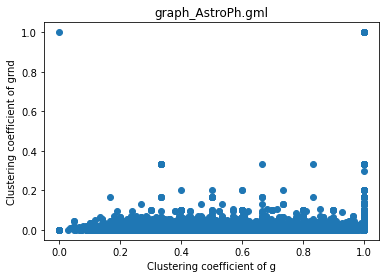

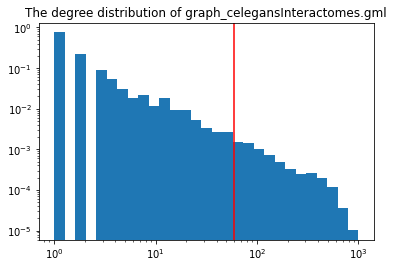

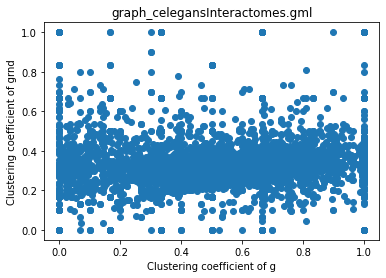

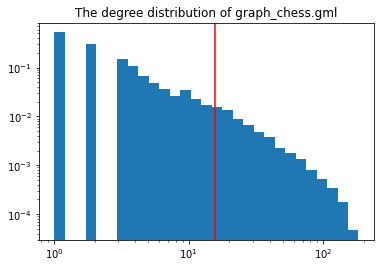

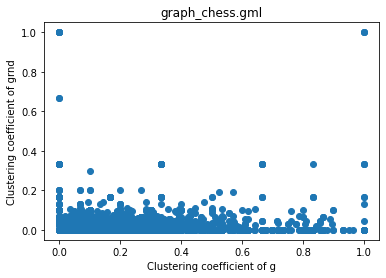

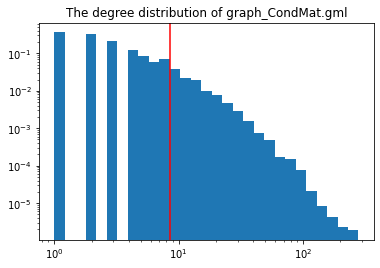

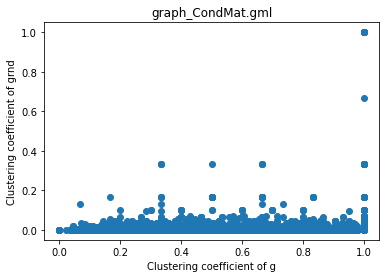

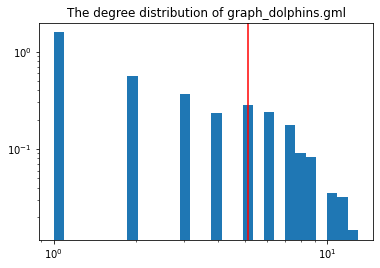

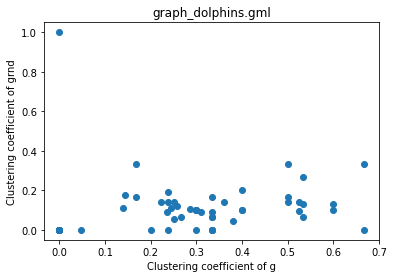

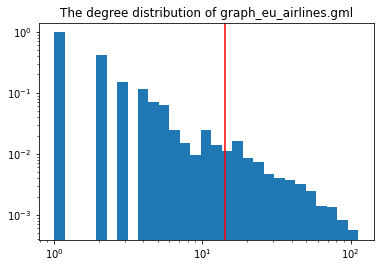

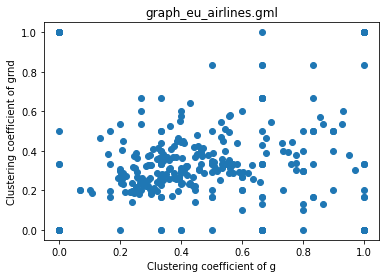

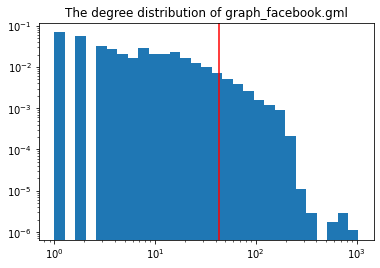

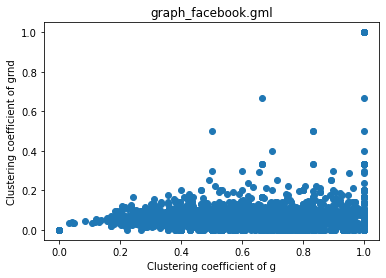

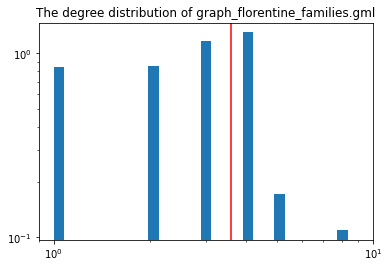

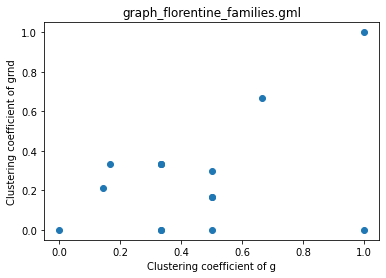

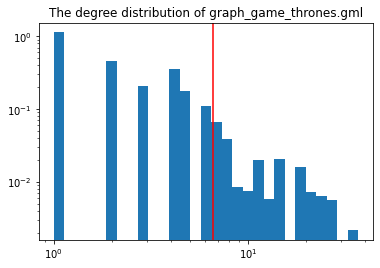

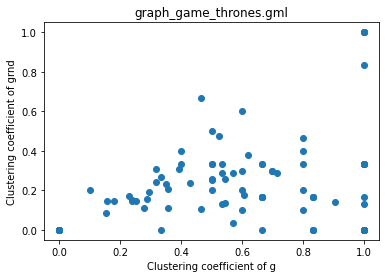

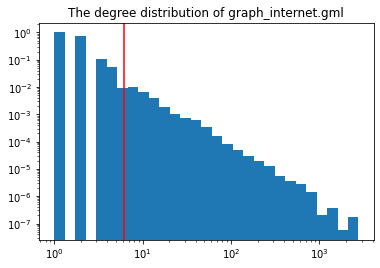

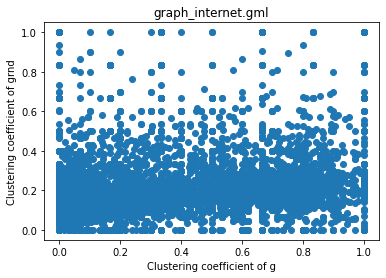

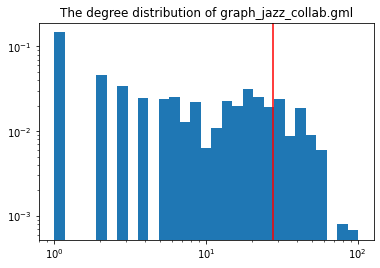

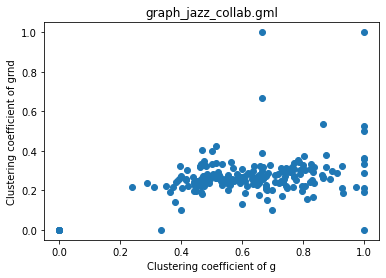

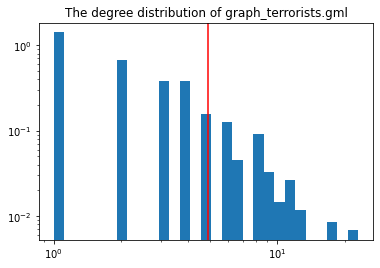

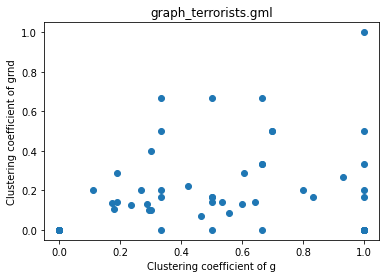

In [6]:
for i in range(len(myfiles)):
    # Read a file
    g = nx.read_gml('./data/' + myfiles[i])
    grnd = nx.algorithms.smallworld.random_reference(g, connectivity=False)
    # 1. Plot the degree distribution in double-logscale and mark w/ a vertical line the average degree <k>
    plot_degree_dstr(g, myfiles[i])
    # 2. For each node, compute the clustering coefficient in the graphs g & g_rnd
    c1 = nx.clustering(g)
    c2 = nx.clustering(grnd)
    # 3. Do a scatter plot of C(i) vs. C_rnd(i)
    plt.scatter(c1.values(), c2.values())
    plt.xlabel('Clustering coefficient of g')
    plt.ylabel('Clustering coefficient of grnd')
    plt.title(myfiles[i])
    plt.show()